# Import Needed Libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Import the data

In [120]:
df=pd.read_csv('hotel_bookings.csv')

Read sample of data

In [121]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [122]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# EDA

In [123]:
df.shape

(119390, 32)

In [124]:
#checking datatypes
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

There are numerical and categorical values



In [125]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [126]:
df.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [127]:
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

check if we have any missing values

In [128]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Null values heatmap

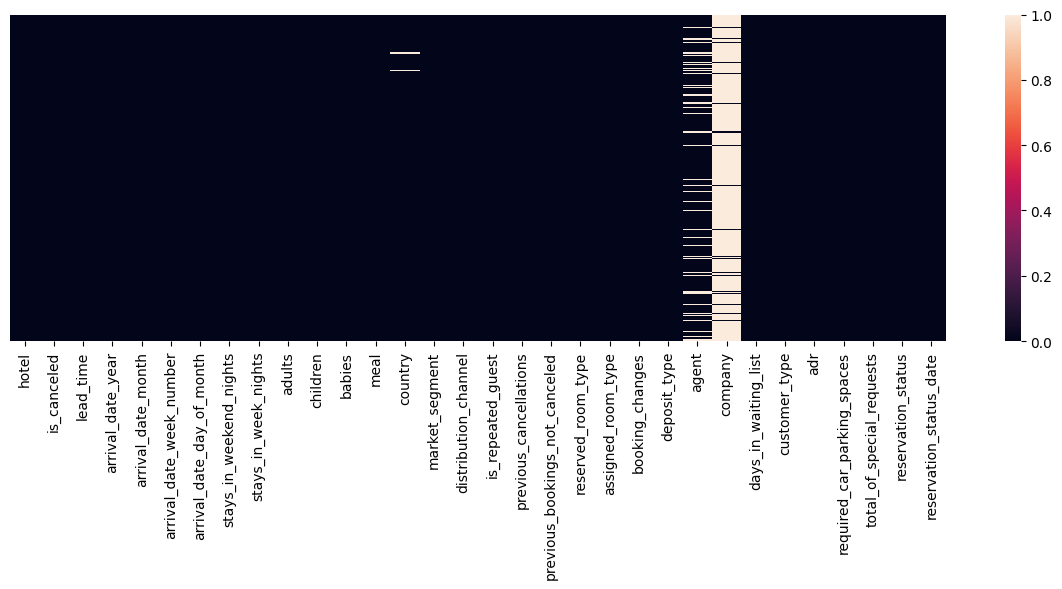

In [129]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

drop columns with high missing values

In [130]:
df=df.drop(['agent','company'],axis=1)

In [131]:
df=df.dropna(axis=0)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# No more missing values in the data



check repeated rows

In [132]:
df.duplicated().sum()

31984

In [133]:
#remove repeated rows
df.drop_duplicates(inplace=True)
# check that removing is done
df.duplicated().sum()

0

# numerical and categorical columns

In [134]:
# numerical columns
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.columns.tolist()

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [135]:
#categorical columns
df_num = df.select_dtypes(include = ['object'])
df_num.columns.tolist()

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [136]:
# creating categorical dataframe

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_df=df[cat_cols]
cat_df.nunique()

hotel                        2
arrival_date_month          12
meal                         5
country                    177
market_segment               7
distribution_channel         5
reserved_room_type          10
assigned_room_type          12
deposit_type                 3
customer_type                4
reservation_status           3
reservation_status_date    926
dtype: int64

unique values of each column

In [137]:
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'E

 Show value counts for the categorical coluumns

In [138]:
categorical_coluumns =['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date']


for col in categorical_coluumns:
    d_type = df[col].dtype

    if d_type != "object" and (df[col] > 1).any().any():
        plt.figure(figsize=(8, 4))
        sns.histplot([col], bins=50, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(f'{col}')
        plt.show()

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for hotel:
hotel
City Hotel      53404
Resort Hotel    33510
Name: count, dtype: int64
Counts for arrival_date_month:
arrival_date_month
August       11229
July         10020
May           8341
April         7869
June          7752
March         7457
October       6883
September     6657
February      6040
December      5080
November      4950
January       4636
Name: count, dtype: int64
Counts for meal:
meal
BB           67540
SC            9473
HB            9054
Undefined      488
FB             359
Name: count, dtype: int64
Counts for country:
country
PRT    27436
GBR    10431
FRA     8837
ESP     7250
DEU     5385
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64
Counts for market_segment:
market_segment
Online TA        51534
Offline TA/TO    13849
Direct           11645
Groups            4936
Corporate         4025
Complementary      698
Aviation           227
Name: count, dtype: int64
Counts for distribut

# target column

In [139]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

In [140]:
# Canceled=1, Not canceled= 0
df['is_canceled'].value_counts()

is_canceled
0    62931
1    23983
Name: count, dtype: int64

disribution of target column

# Data Visualization

Distribution of numerical columns

array([[<Axes: title={'center': 'is_canceled'}>,
        <Axes: title={'center': 'lead_time'}>,
        <Axes: title={'center': 'arrival_date_year'}>,
        <Axes: title={'center': 'arrival_date_week_number'}>],
       [<Axes: title={'center': 'arrival_date_day_of_month'}>,
        <Axes: title={'center': 'stays_in_weekend_nights'}>,
        <Axes: title={'center': 'stays_in_week_nights'}>,
        <Axes: title={'center': 'adults'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'babies'}>,
        <Axes: title={'center': 'is_repeated_guest'}>,
        <Axes: title={'center': 'previous_cancellations'}>],
       [<Axes: title={'center': 'previous_bookings_not_canceled'}>,
        <Axes: title={'center': 'booking_changes'}>,
        <Axes: title={'center': 'days_in_waiting_list'}>,
        <Axes: title={'center': 'adr'}>],
       [<Axes: title={'center': 'required_car_parking_spaces'}>,
        <Axes: title={'center': 'total_of_special_requests'}>, <Axe

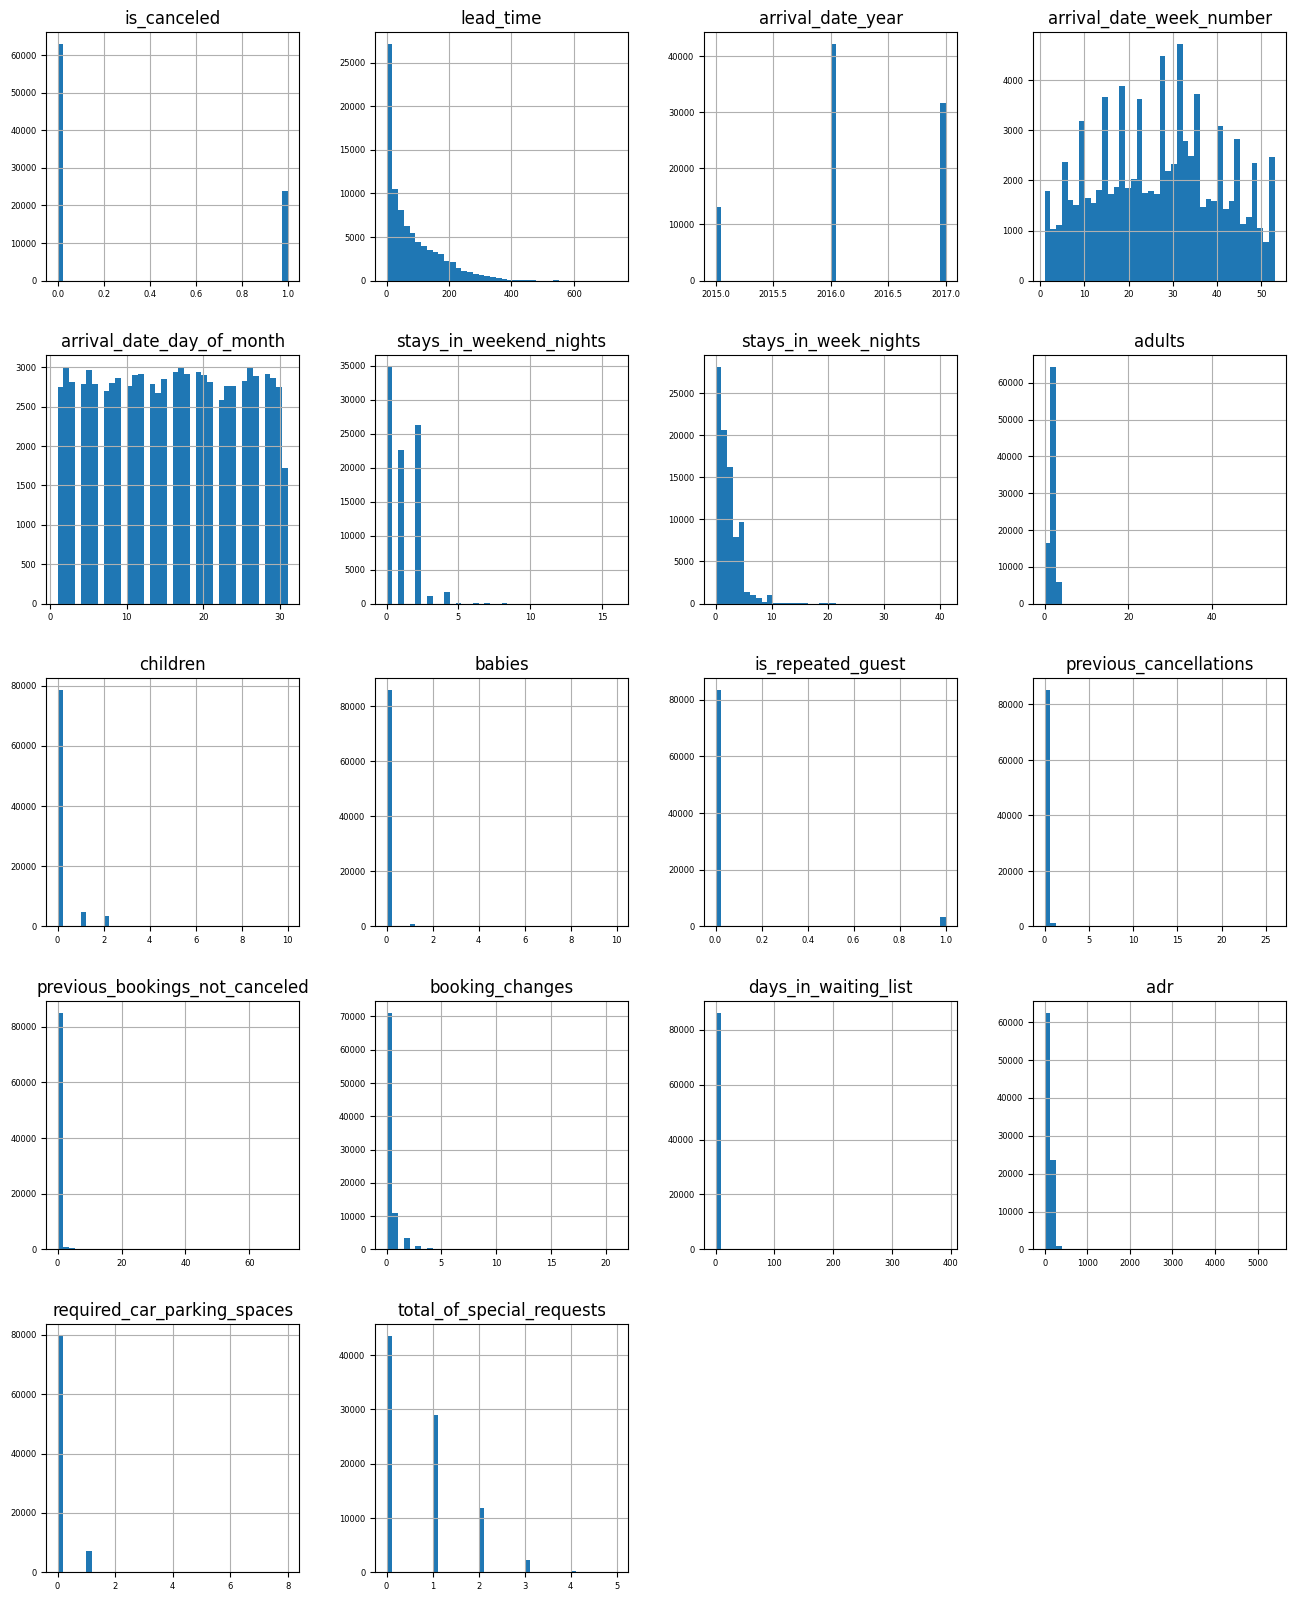

In [141]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)

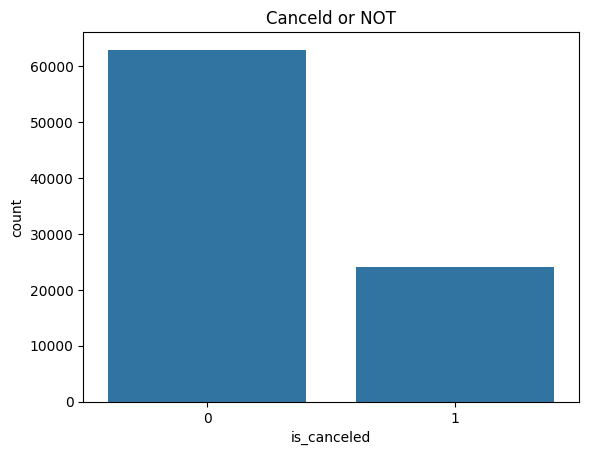

In [142]:
#disribution of target column
sns.countplot(x=df['is_canceled'])
plt.title('Canceld or NOT');

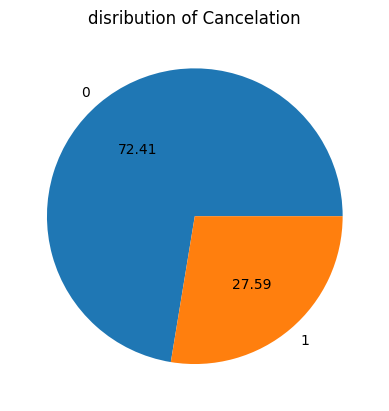

In [143]:
#Another graph for "is_canceled" column
plt.pie(df.groupby(by=["is_canceled"]).size(), labels = df["is_canceled"].unique(), autopct = "%0.2f")
plt.title('disribution of Cancelation');
plt.show()

According to the pie chart, 72% of bookings were not canceled and 28% of the bookings were canceled at the Hotel.


Text(0.5, 1.0, 'Arriving year, Lead time and Cancelations')

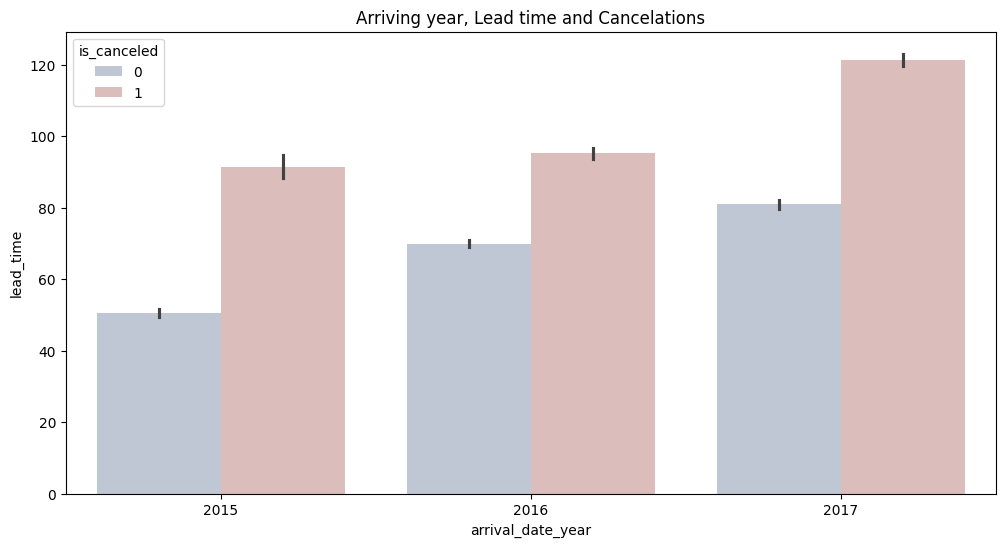

In [144]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= df, palette='vlag')
plt.title('Arriving year, Lead time and Cancelations')

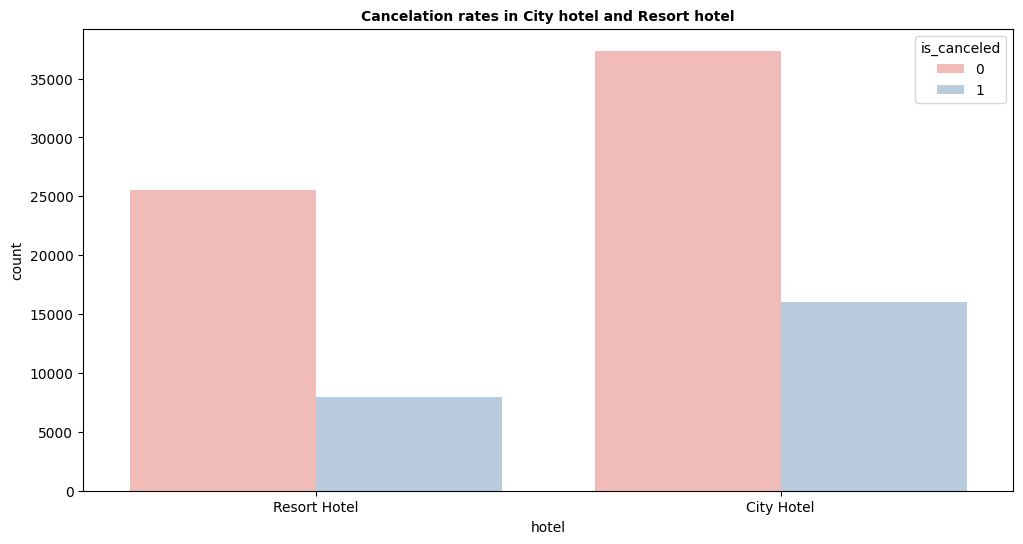

In [145]:
plt.figure(figsize=(12, 6))

sns.countplot(x='hotel',hue="is_canceled", data=df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontweight="bold", size=10)
plt.show()

Text(0.5, 1.0, 'Arrivals per year in Both hotels ')

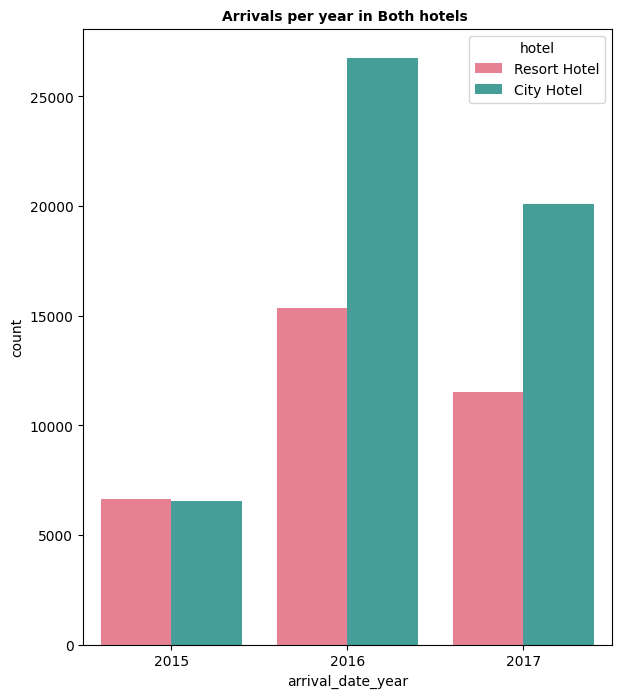

In [146]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=df,palette='husl')
plt.title("Arrivals per year in Both hotels ",fontweight="bold", size=10)

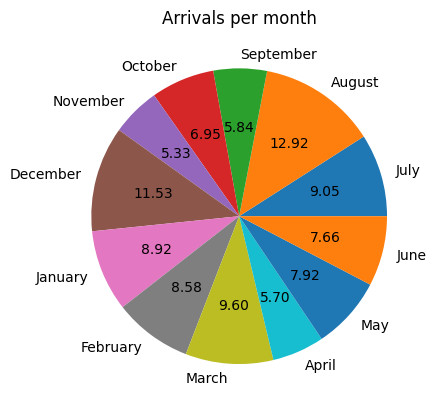

In [147]:
plt.pie(df.groupby(by=["arrival_date_month"]).size(), labels = df["arrival_date_month"].unique(), autopct = "%0.2f")
plt.title('Arrivals per month')
plt.show()

Text(0.5, 1.0, 'Types of market segment')

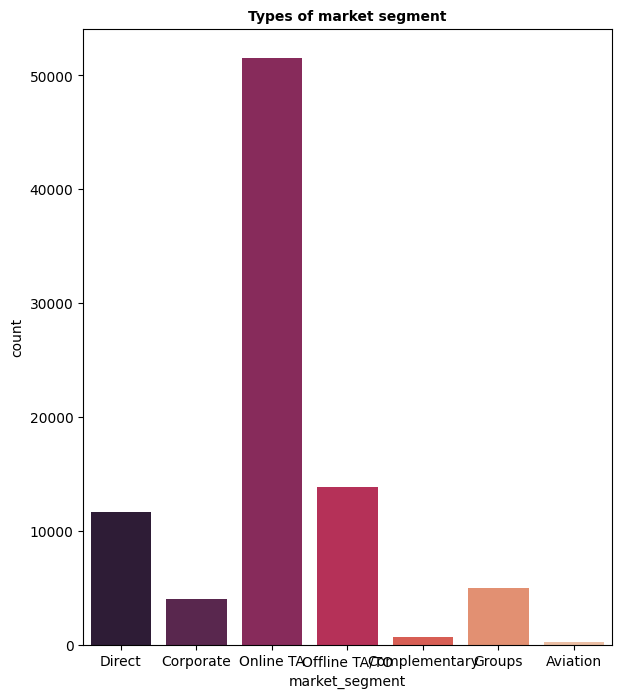

In [148]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='market_segment', data=df, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=10)

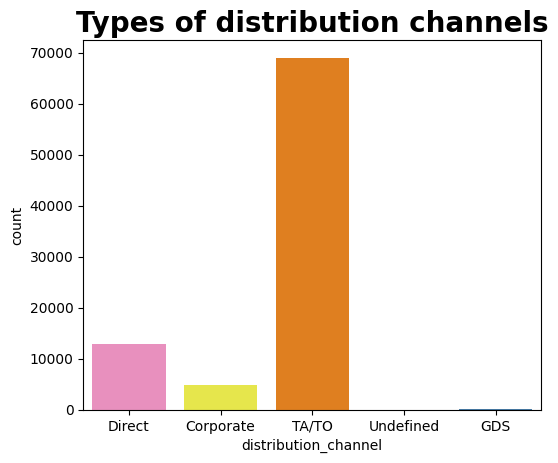

In [149]:
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'distribution_channel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

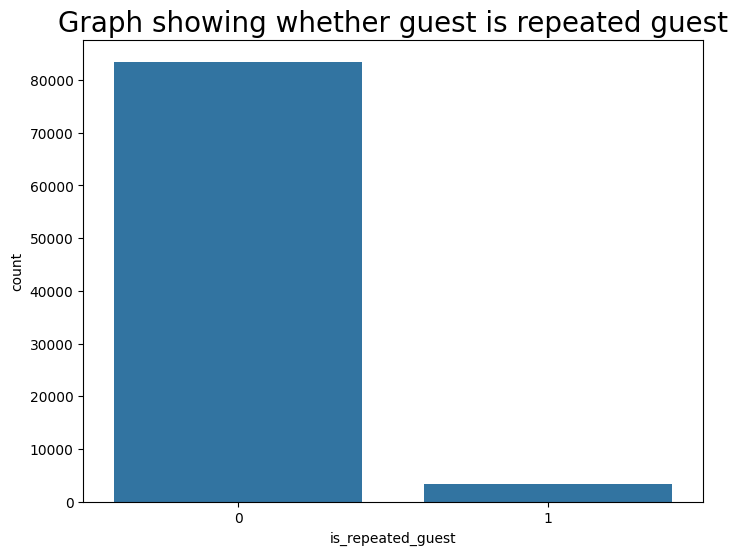

In [150]:
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

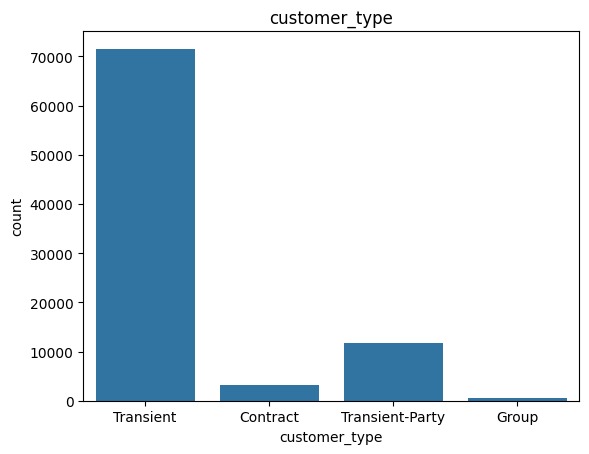

In [151]:
sns.countplot(x=df['customer_type'])
plt.title('customer_type');

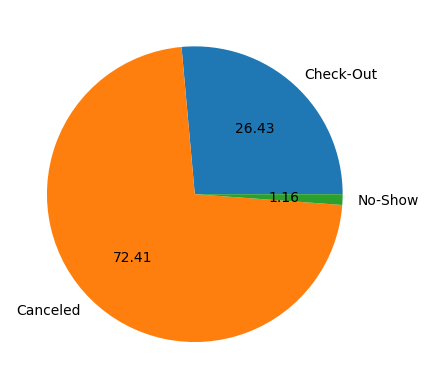

In [152]:
plt.pie(df.groupby(by=["reservation_status"]).size(), labels = df["reservation_status"].unique(), autopct = "%0.2f")
plt.show()

# Split dataframe into X and y

In [153]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [154]:
#convert categorical into numerical
X=pd.get_dummies(X,dtype=float,drop_first=True)
X

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,342,2015,27,1,0,0,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,737,2015,27,1,0,0,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2015,27,1,0,1,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,2015,27,1,0,1,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,14,2015,27,1,0,2,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
119386,102,2017,35,31,2,5,3,0.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
119387,34,2017,35,31,2,5,2,0.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
119388,109,2017,35,31,2,5,2,0.0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


split dataframe into train and test

In [155]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# ML models

# Random Forest

In [156]:
RF_model = RandomForestClassifier(n_estimators=100)
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [157]:
RF_model.score(X_train , y_train)

1.0

In [158]:
RF_pred = RF_model.predict(X_test)

In [159]:
accuracy_score(y_test , RF_pred)

1.0

In [160]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12626
           1       1.00      1.00      1.00      4757

    accuracy                           1.00     17383
   macro avg       1.00      1.00      1.00     17383
weighted avg       1.00      1.00      1.00     17383



Text(95.72222222222221, 0.5, 'Truh')

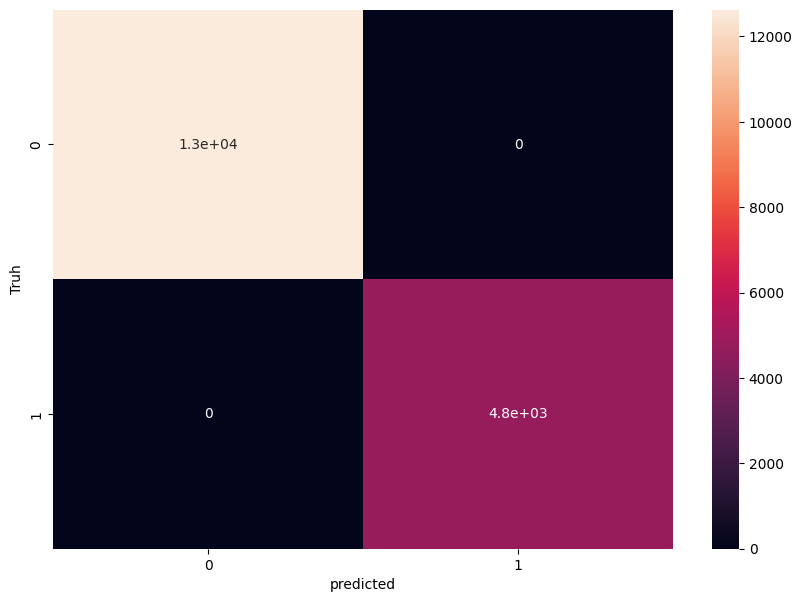

In [161]:
cm1 = confusion_matrix(y_test,RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

## Saving the RF model

In [162]:
import pickle

In [163]:
filename = 'hotel_cancellation_rf.pkl'
pickle.dump(RF_model, open(filename, 'wb'))

In [164]:
loaded_model = pickle.load(open('hotel_cancellation_rf.pkl', 'rb'))

In [165]:
for column in X.columns:
  print(column)

lead_time
arrival_date_year
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests
hotel_Resort Hotel
arrival_date_month_August
arrival_date_month_December
arrival_date_month_February
arrival_date_month_January
arrival_date_month_July
arrival_date_month_June
arrival_date_month_March
arrival_date_month_May
arrival_date_month_November
arrival_date_month_October
arrival_date_month_September
meal_FB
meal_HB
meal_SC
meal_Undefined
country_AGO
country_AIA
country_ALB
country_AND
country_ARE
country_ARG
country_ARM
country_ASM
country_ATA
country_ATF
country_AUS
country_AUT
country_AZE
country_BDI
country_BEL
country_BEN
country_BFA
country_BGD
country_BGR
country_BHR
country_BHS
country_BIH
country_BLR
country_BOL
country_BRA
country_BRB
country_BWA
country_CAF
cou

## Saving the Train Model RF

In [166]:
with open('x_train_rf.pkl', 'wb') as file:
    pickle.dump(X_train, file)

# Decision Tree

In [167]:
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train , y_train)

DecisionTreeClassifier(random_state=42)

In [168]:
DT_model.score(X_test , y_test)

1.0

In [169]:
DT_pred=DT_model.predict(X_test)

In [170]:
accuracy_score(y_test ,DT_pred )

1.0

In [171]:
print(classification_report(y_test , DT_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12626
           1       1.00      1.00      1.00      4757

    accuracy                           1.00     17383
   macro avg       1.00      1.00      1.00     17383
weighted avg       1.00      1.00      1.00     17383



Text(95.72222222222221, 0.5, 'Truh')

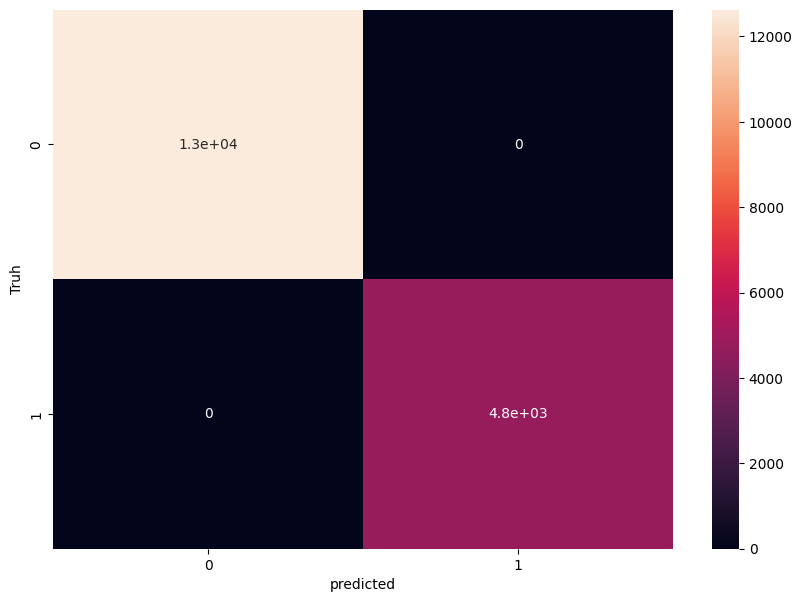

In [172]:
cm2 = confusion_matrix(y_test,DT_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truh')

## Saving the DT model

In [173]:
filename = 'hotel_cancellation_dt.pkl'
pickle.dump(DT_model, open(filename, 'wb'))

In [174]:
loaded_model = pickle.load(open('hotel_cancellation_dt.pkl', 'rb'))

In [175]:
for column in X.columns:
  print(column)

lead_time
arrival_date_year
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests
hotel_Resort Hotel
arrival_date_month_August
arrival_date_month_December
arrival_date_month_February
arrival_date_month_January
arrival_date_month_July
arrival_date_month_June
arrival_date_month_March
arrival_date_month_May
arrival_date_month_November
arrival_date_month_October
arrival_date_month_September
meal_FB
meal_HB
meal_SC
meal_Undefined
country_AGO
country_AIA
country_ALB
country_AND
country_ARE
country_ARG
country_ARM
country_ASM
country_ATA
country_ATF
country_AUS
country_AUT
country_AZE
country_BDI
country_BEL
country_BEN
country_BFA
country_BGD
country_BGR
country_BHR
country_BHS
country_BIH
country_BLR
country_BOL
country_BRA
country_BRB
country_BWA
country_CAF
cou

Saving the Train Model DT

In [176]:
with open('x_train_dt.pkl', 'wb') as file:
    pickle.dump(X_train, file)

# Extra features testing Xperimenting

In [177]:
# # prompt: generate a feature where user can give some input and accordingly the hotel cancellation prediction model will predict whether the booking will be cancelled or not

# import pandas as pd
# # Create a function to take user input and predict cancellation
# def predict_cancellation():
#   # Get user input for features
#   hotel = input("Enter hotel type (Resort Hotel or City Hotel): ")
#   lead_time = int(input("Enter lead time (days): "))
#   arrival_date_year = int(input("Enter arrival year: "))
#   arrival_date_month = input("Enter arrival month (e.g., January, February): ")
#   arrival_date_week_number = int(input("Enter arrival week number: "))
#   arrival_date_day_of_month = int(input("Enter arrival day of month: "))
#   stays_in_weekend_nights = int(input("Enter number of weekend nights stayed: "))
#   stays_in_week_nights = int(input("Enter number of week nights stayed: "))
#   adults = int(input("Enter number of adults: "))
#   children = int(input("Enter number of children: "))
#   babies = int(input("Enter number of babies: "))
#   meal = input("Enter meal type (e.g., BB, FB, HB): ")
#   country = input("Enter country code (e.g., PRT, GBR): ")
#   market_segment = input("Enter market segment (e.g., Online TA, Offline TA/TO): ")
#   distribution_channel = input("Enter distribution channel (e.g., TA/TO, Direct): ")
#   is_repeated_guest = int(input("Is the guest a repeated guest? (0 for No, 1 for Yes): "))
#   previous_cancellations = int(input("Enter number of previous cancellations: "))
#   previous_bookings_not_canceled = int(input("Enter number of previous bookings not canceled: "))
#   reserved_room_type = input("Enter reserved room type (e.g., A, C, D): ")
#   assigned_room_type = input("Enter assigned room type (e.g., A, C, D): ")
#   booking_changes = int(input("Enter number of booking changes: "))
#   deposit_type = input("Enter deposit type (e.g., No Deposit, Non Refund, Refundable): ")
#   days_in_waiting_list = int(input("Enter number of days in waiting list: "))
#   customer_type = input("Enter customer type (e.g., Transient, Contract, Transient-Party): ")
#   adr = float(input("Enter average daily rate: "))
#   required_car_parking_spaces = int(input("Enter number of required car parking spaces: "))
#   total_of_special_requests = int(input("Enter total number of special requests: "))
#   reservation_status_date = input("Enter reservation status date (YYYY-MM-DD): ")

#   # Create a dataframe from user input
#   input_data = pd.DataFrame({
#       'hotel': [hotel],
#       'lead_time': [lead_time],
#       'arrival_date_year': [arrival_date_year],
#       'arrival_date_month': [arrival_date_month],
#       'arrival_date_week_number': [arrival_date_week_number],
#       'arrival_date_day_of_month': [arrival_date_day_of_month],
#       'stays_in_weekend_nights': [stays_in_weekend_nights],
#       'stays_in_week_nights': [stays_in_week_nights],
#       'adults': [adults],
#       'children': [children],
#       'babies': [babies],
#       'meal': [meal],
#       'country': [country],
#       'market_segment': [market_segment],
#       'distribution_channel': [distribution_channel],
#       'is_repeated_guest': [is_repeated_guest],
#       'previous_cancellations': [previous_cancellations],
#       'previous_bookings_not_canceled': [previous_bookings_not_canceled],
#       'reserved_room_type': [reserved_room_type],
#       'assigned_room_type': [assigned_room_type],
#       'booking_changes': [booking_changes],
#       'deposit_type': [deposit_type],
#       'days_in_waiting_list': [days_in_waiting_list],
#       'customer_type': [customer_type],
#       'adr': [adr],
#       'required_car_parking_spaces': [required_car_parking_spaces],
#       'total_of_special_requests': [total_of_special_requests],
#       'reservation_status_date': [reservation_status_date]
#   })

#   # One-hot encode categorical features
#   input_data = pd.get_dummies(input_data, dtype=float, drop_first=True)

#   # Align input data with training data columns
#   missing_cols = set(X_train.columns) - set(input_data.columns)
#   for col in missing_cols:
#     input_data[col] = 0
#   input_data = input_data[X_train.columns]

#   # Make prediction using Random Forest model
#   prediction = RF_model.predict(input_data)

#   # Print prediction result
#   if prediction[0] == 0:
#     print("The booking is predicted NOT to be canceled.")
#   else:
#     print("The booking is predicted to be canceled.")

# # Call the function to start prediction
# predict_cancellation()


In [178]:
# prompt: generate a feature where user can give some input and accordingly the hotel cancellation prediction model will predict whether the booking will be cancelled or not

import pandas as pd
#@title Hotel Cancellation Prediction

hotel = "Resort Hotel" #@param ["Resort Hotel", "City Hotel"]
lead_time = 10 # @param {"type":"number"}
arrival_date_year = 2015 #@param {type:"slider", min:2015, max:2017, step:1}
arrival_date_month = "July" #@param ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
arrival_date_week_number = 1 #@param {type:"slider", min:1, max:53, step:1}
arrival_date_day_of_month = 1 #@param {type:"slider", min:1, max:31, step:1}
stays_in_weekend_nights = 0 #@param {type:"slider", min:0, max:19, step:1}
stays_in_week_nights = 5 #@param {type:"slider", min:0, max:50, step:1}
adults = 2 #@param {type:"slider", min:0, max:55, step:1}
children = 0 #@param {type:"slider", min:0, max:10, step:1}
babies = 0 #@param {type:"slider", min:0, max:10, step:1}
meal = "BB" #@param ["BB", "FB", "HB", "SC", "Undefined"]
country = "PRT" #@param {type:"string"}
market_segment = "Direct" #@param ["Direct", "Corporate", "Online TA", "Offline TA/TO", "Complementary", "Groups", "Undefined", "Aviation"]
distribution_channel = "Direct" #@param ["Direct", "Corporate", "TA/TO", "Undefined", "GDS"]
is_repeated_guest = 0 #@param {type:"slider", min:0, max:1, step:1}
previous_cancellations = 0 #@param {type:"slider", min:0, max:26, step:1}
previous_bookings_not_canceled = 0 #@param {type:"slider", min:0, max:72, step:1}
reserved_room_type = "A" #@param ["A", "B", "C", "D", "E", "F", "G", "H", "L", "P"]
assigned_room_type = "A" #@param ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "P"]
booking_changes = 0 #@param {type:"slider", min:0, max:21, step:1}
deposit_type = "No Deposit" #@param ["No Deposit", "Non Refund", "Refundable"]
days_in_waiting_list = 0 #@param {type:"slider", min:0, max:391, step:1}
customer_type = "Transient" #@param ["Transient", "Contract", "Transient-Party", "Group"]
adr = 75 #@param {type:"slider", min:0, max:5400, step:1}
required_car_parking_spaces = 0 #@param {type:"slider", min:0, max:8, step:1}
total_of_special_requests = 0 #@param {type:"slider", min:0, max:5, step:1}
reservation_status_date = "2015-07-01" #@param {type:"date"}

# Create a dataframe from user input
input_data = pd.DataFrame({
    'hotel': [hotel],
    'lead_time': [lead_time],
    'arrival_date_year': [arrival_date_year],
    'arrival_date_month': [arrival_date_month],
    'arrival_date_week_number': [arrival_date_week_number],
    'arrival_date_day_of_month': [arrival_date_day_of_month],
    'stays_in_weekend_nights': [stays_in_weekend_nights],
    'stays_in_week_nights': [stays_in_week_nights],
    'adults': [adults],
    'children': [children],
    'babies': [babies],
    'meal': [meal],
    'country': [country],
    'market_segment': [market_segment],
    'distribution_channel': [distribution_channel],
    'is_repeated_guest': [is_repeated_guest],
    'previous_cancellations': [previous_cancellations],
    'previous_bookings_not_canceled': [previous_bookings_not_canceled],
    'reserved_room_type': [reserved_room_type],
    'assigned_room_type': [assigned_room_type],
    'booking_changes': [booking_changes],
    'deposit_type': [deposit_type],
    'days_in_waiting_list': [days_in_waiting_list],
    'customer_type': [customer_type],
    'adr': [adr],
    'required_car_parking_spaces': [required_car_parking_spaces],
    'total_of_special_requests': [total_of_special_requests],
    'reservation_status_date': [reservation_status_date]
})

# One-hot encode categorical features
input_data = pd.get_dummies(input_data, dtype=float, drop_first=True)

# Align input data with training data columns
missing_cols = set(X_train.columns) - set(input_data.columns)
for col in missing_cols:
  input_data[col] = 0
input_data = input_data[X_train.columns]

# Make prediction using Random Forest model
prediction = DT_model.predict(input_data)
#DT_pred=DT_model.predict(X_test)
# Print prediction result
if prediction[0] == 0:
  print("The booking is predicted NOT to be canceled.")
else:
  print("The booking is predicted to be canceled.")


The booking is predicted to be canceled.


In [179]:
# # prompt: generate a feature where user can give some input and accordingly the hotel cancellation prediction model will predict whether the booking will be cancelled or not

# import pandas as pd
# #@title Hotel Cancellation Prediction

# hotel = "Resort Hotel" #@param ["Resort Hotel", "City Hotel"]
# lead_time = 10 # @param {"type":"number"}
# arrival_date_year = 2015 #@param {type:"slider", min:2015, max:2017, step:1}
# arrival_date_month = "July" #@param ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
# arrival_date_week_number = 1 #@param {type:"slider", min:1, max:53, step:1}
# arrival_date_day_of_month = 1 #@param {type:"slider", min:1, max:31, step:1}
# stays_in_weekend_nights = 0 #@param {type:"slider", min:0, max:19, step:1}
# stays_in_week_nights = 5 #@param {type:"slider", min:0, max:50, step:1}
# adults = 2 #@param {type:"slider", min:0, max:55, step:1}
# children = 0 #@param {type:"slider", min:0, max:10, step:1}
# babies = 0 #@param {type:"slider", min:0, max:10, step:1}
# meal = "BB" #@param ["BB", "FB", "HB", "SC", "Undefined"]
# country = "PRT" #@param {type:"string"}
# market_segment = "Direct" #@param ["Direct", "Corporate", "Online TA", "Offline TA/TO", "Complementary", "Groups", "Undefined", "Aviation"]
# distribution_channel = "Direct" #@param ["Direct", "Corporate", "TA/TO", "Undefined", "GDS"]
# is_repeated_guest = 0 #@param {type:"slider", min:0, max:1, step:1}
# previous_cancellations = 0 #@param {type:"slider", min:0, max:26, step:1}
# previous_bookings_not_canceled = 0 #@param {type:"slider", min:0, max:72, step:1}
# reserved_room_type = "A" #@param ["A", "B", "C", "D", "E", "F", "G", "H", "L", "P"]
# assigned_room_type = "A" #@param ["A", "B", "C", "D", "E", "F", "G", "H", "I", "K", "L", "P"]
# booking_changes = 0 #@param {type:"slider", min:0, max:21, step:1}
# deposit_type = "No Deposit" #@param ["No Deposit", "Non Refund", "Refundable"]
# days_in_waiting_list = 0 #@param {type:"slider", min:0, max:391, step:1}
# customer_type = "Transient" #@param ["Transient", "Contract", "Transient-Party", "Group"]
# adr = 75 #@param {type:"slider", min:0, max:5400, step:1}
# required_car_parking_spaces = 0 #@param {type:"slider", min:0, max:8, step:1}
# total_of_special_requests = 0 #@param {type:"slider", min:0, max:5, step:1}
# reservation_status_date = "2015-07-01" #@param {type:"date"}

# # Create a dataframe from user input
# input_data = pd.DataFrame({
#     'hotel': [hotel],
#     'lead_time': [lead_time],
#     'arrival_date_year': [arrival_date_year],
#     'arrival_date_month': [arrival_date_month],
#     'arrival_date_week_number': [arrival_date_week_number],
#     'arrival_date_day_of_month': [arrival_date_day_of_month],
#     'stays_in_weekend_nights': [stays_in_weekend_nights],
#     'stays_in_week_nights': [stays_in_week_nights],
#     'adults': [adults],
#     'children': [children],
#     'babies': [babies],
#     'meal': [meal],
#     'country': [country],
#     'market_segment': [market_segment],
#     'distribution_channel': [distribution_channel],
#     'is_repeated_guest': [is_repeated_guest],
#     'previous_cancellations': [previous_cancellations],
#     'previous_bookings_not_canceled': [previous_bookings_not_canceled],
#     'reserved_room_type': [reserved_room_type],
#     'assigned_room_type': [assigned_room_type],
#     'booking_changes': [booking_changes],
#     'deposit_type': [deposit_type],
#     'days_in_waiting_list': [days_in_waiting_list],
#     'customer_type': [customer_type],
#     'adr': [adr],
#     'required_car_parking_spaces': [required_car_parking_spaces],
#     'total_of_special_requests': [total_of_special_requests],
#     'reservation_status_date': [reservation_status_date]
# })

# # One-hot encode categorical features
# input_data = pd.get_dummies(input_data, dtype=float, drop_first=True)

# # Align input data with training data columns
# missing_cols = set(X_train.columns) - set(input_data.columns)
# for col in missing_cols:
#   input_data[col] = 0
# input_data = input_data[X_train.columns]

# # Make prediction using Random Forest model
# prediction = RF_model.predict(input_data)

# # Print prediction result
# if prediction[0] == 0:
#   print("The booking is predicted NOT to be canceled.")
# else:
#   print("The booking is predicted to be canceled.")
